In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Chart 1, from my colleague Lance at PNNL

In [2]:
data = pd.read_csv("data/40xData.txt", sep="\t", names=["DilFactor", "Blue", "Green", "Yellow", "Orange", "Red"])
err = pd.read_csv("data/40xUncertainty.txt", sep="\t", names=["Wavelength", "95%CI", "Unknown"])
err.index = ["Blue", "Green", "Yellow", "Orange", "Red"]

In [3]:
# Uncomment to see dataframe head
# data.head()

In [4]:
# Uncomment to see dataframe
# err.head()

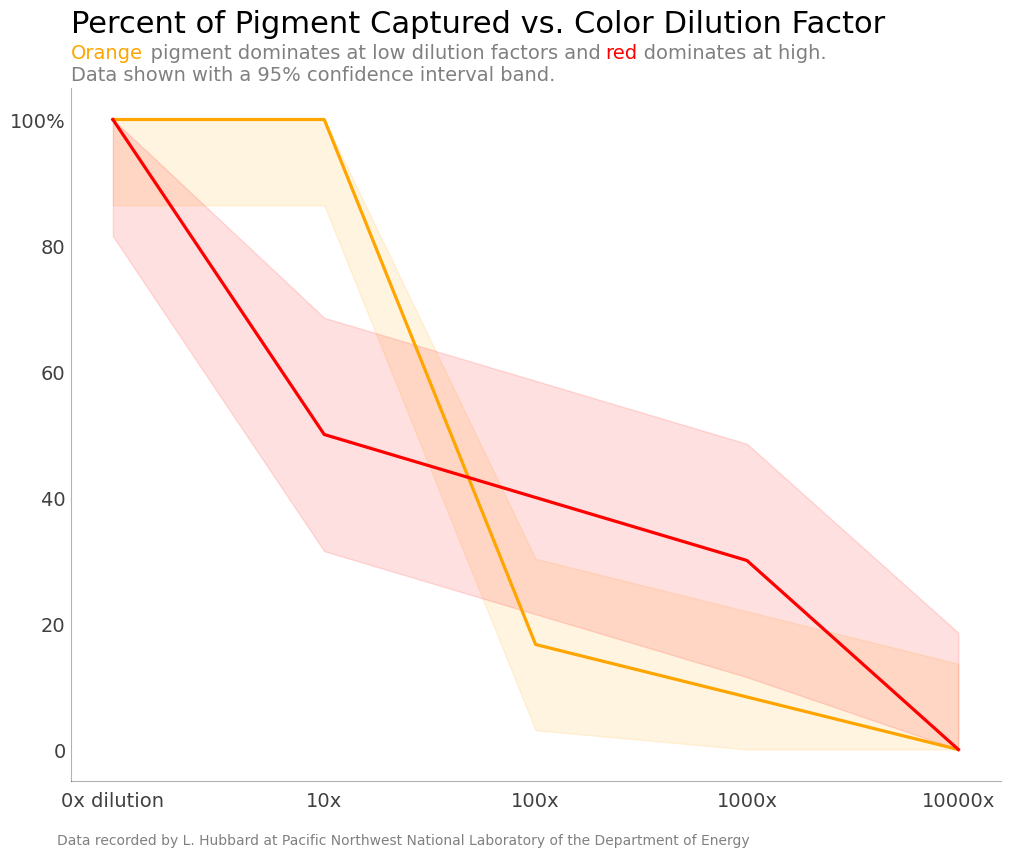

In [5]:
fig, ax = plt.subplots(figsize=(12,9))

for color in err.index:
    
    if (color == "Orange") | (color == "Red"):
        alphaLine = 1
        alphaShade = 0.12
        lineColor = color
        shadeColor = color
        linewidth = 2.3
    else:
        alphaLine = 0.2
        alphaShade = 0.1
        lineColor = "none"
        shadeColor = "none"
        linewidth = 1
    
    ax.plot(data["DilFactor"], data[color], "-", c=lineColor, alpha=alphaLine, linewidth=linewidth)
    ax.fill_between(data["DilFactor"], np.clip(data[color]-err.loc[color]["95%CI"], 0, None), np.clip(data[color]+err.loc[color]["95%CI"], None, 1), alpha=alphaShade, color=shadeColor)
    


# Adjust the spines
ax.spines['right'].set_visible(False)  # Remove the right vertical line
ax.spines['top'].set_visible(False)    # Remove the top horizontal line
ax.spines['left'].set_color((0, 0, 0, 0.3))  # Set the left spine with 50% transparency (alpha = 0.5)
ax.spines['bottom'].set_color((0, 0, 0, 0.3))  # Set the bottom spine with 50% transparency


# Use the plt.txt to make the actual title and plt.title for the subtitle, based on default positioning
plt.text(0, 1.072, "Percent of Pigment Captured vs. Color Dilution Factor", transform=ax.transAxes, fontsize=22, color='black', va='bottom', ha='left') 
plt.title("             pigment dominates at low dilution factors and       dominates at high.\nData shown with a 95% confidence interval band.", loc='left', fontsize=14, color='grey')
plt.text(0, 1.038, "Orange", transform=ax.transAxes, fontsize=14, color='orange', va='bottom', ha='left') 
plt.text(0.575, 1.038, "red", transform=ax.transAxes, fontsize=14, color='red', va='bottom', ha='left') 

# Y axis ticks and adjustments
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(["0", "20", "40", "60", "80", "100%"], fontsize=14, color=(0,0,0,.75))
ax.tick_params(axis='y', length=0)  # Hide y-axis tick marks, keep labels

# X axis and ticks adjustments
ax.semilogx()
ax.set_xticks([1, 10, 100, 1000, 10000])      # the positions I want the labels
ax.set_xticklabels(['0x dilution', '10x', '100x', '1000x', '10000x'], fontsize=14, color=(0,0,0,.75)) # The labels for each position
ax.xaxis.set_ticks_position('none')

# Caption 
plt.figtext(0.114, 0.04, "Data recorded by L. Hubbard at Pacific Northwest National Laboratory of the Department of Energy", ha='left', fontsize=10, color='grey')

plt.savefig("updatedImages/updated1.png")
plt.show()

## Chart 2, from Kenji

In [6]:
lidOn = np.array([209, 210, 212, 213, 211])
lidOff = np.array([191, 189, 192, 193, 192])
time = np.arange(1,6)

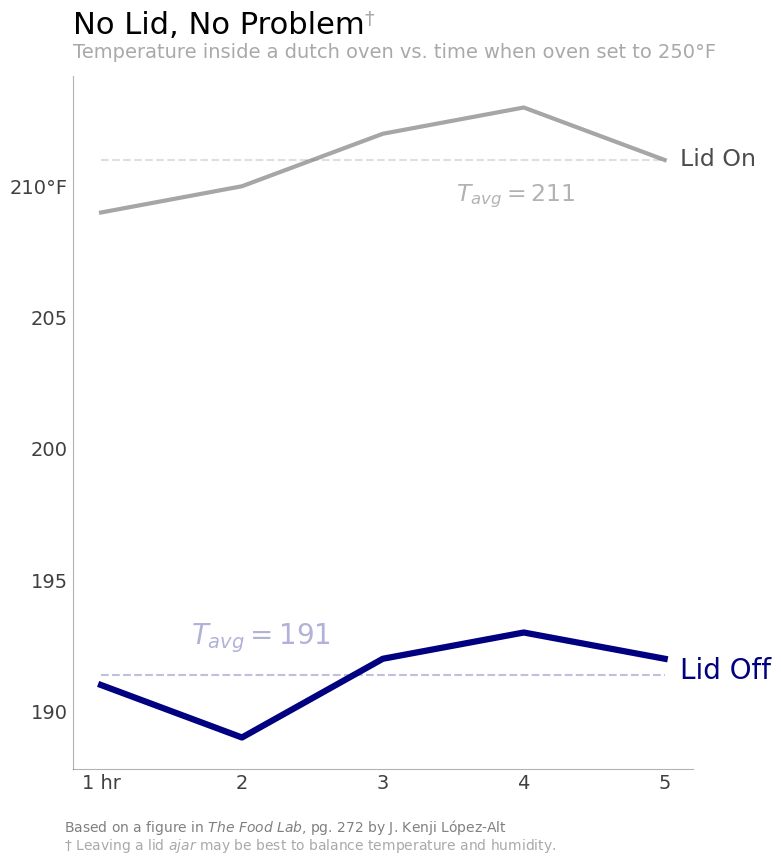

In [7]:
fig, ax = plt.subplots(figsize=(8,9))

ax.plot(time, lidOn, '-', color="grey", alpha=0.7, linewidth=3)
ax.plot(time, lidOff, '-', color="navy", alpha=1, linewidth=4.5)

ax.hlines(np.mean(lidOn), time[0], time[-1]+0.0, color="grey", alpha =0.25,  linestyle="dashed")
ax.hlines(np.mean(lidOff), time[0], time[-1]+0.0, color="navy", alpha =0.25,  linestyle="dashed")

# add labels to chart
lidOnLabel = "$T_{avg} = $" + f"{np.mean(lidOn):.0f}"
ax.text(0.618, .82, lidOnLabel, transform=ax.transAxes, color=(0,0,0,.3), fontsize=17)
ax.text(0.98, 0.87, "Lid On", transform=ax.transAxes, color=(0,0,0,.7), fontsize=17)

lidOffLabel = "$T_{avg} = $" + f"{np.mean(lidOff):.0f}"
ax.text(0.19, 0.18, lidOffLabel, transform=ax.transAxes, color="navy", alpha=0.3, fontsize=20)
ax.text(0.98, 0.13, "Lid Off", transform=ax.transAxes, color="navy", fontsize=20)

# Title and subtitles
# Use the plt.txt to make the actual title and plt.title for the subtitle, based on default positioning
plt.text(0, 1.052, "No Lid, No Problem", transform=ax.transAxes, fontsize=22, color='black', va='bottom', ha='left') 
plt.text(0.47, 1.068, "†",  transform=ax.transAxes, fontsize=14, color='darkgrey', va='bottom', ha='left')
plt.text(0, 1.021, "Temperature inside a dutch oven vs. time when oven set to 250°F", transform=ax.transAxes, fontsize=14, color='darkgrey', va='bottom', ha='left')

#ax.set_title( "$%s \\times 10^{%s}$" % ('3.5','+20'))

# Y axis ticks and adjustments
ax.set_yticks([190, 195, 200, 205, 210])
ax.set_yticklabels(["190", "195", "200", "205", "210°F"], fontsize=14, color=(0,0,0,.75))
ax.tick_params(axis='y', length=0)  

# X axis ticks and adjustments
ax.set_xticks(time)
ax.set_xticklabels(["1 hr", "2", "3", "4", "5"], fontsize=14, color=(0,0,0,.75))
ax.tick_params(axis='x', length=0)  

# Adjust the spines
ax.spines['right'].set_visible(False)  # Remove the right vertical line
ax.spines['top'].set_visible(False)    # Remove the top horizontal line
ax.spines['left'].set_color((0, 0, 0, 0.3))  # Set the left spine with 50% transparency (alpha = 0.5)
ax.spines['bottom'].set_color((0, 0, 0, 0.3))  # Set the bottom spine with 50% transparency

caption = "Based on a figure in " + "$\it{The}$ $\it{Food}$ $\it{Lab}$, pg. 272 by J. Kenji López-Alt"
plt.figtext(0.114, 0.04, caption, ha='left', fontsize=10, color='grey')
plt.figtext(0.114, 0.02, "† Leaving a lid $\it{ajar}$ may be best to balance temperature and humidity.", ha='left', fontsize=10, color='darkgrey');
plt.savefig("updatedImages/updated2.png")

#### Chart 3 from Regis Alumni publication


In [10]:
ser = pd.Series({"White":55.8,
                 "Latino":18.9,
                 "Unknown":11, # note that I've added "Non-US resident" column to Unknown. See original3.png for details
                 "Black":5.4,
                 "Asian":5.3,
                 "Mixed":3.7,
                 "Native":0.4,
                 "Islander":0.2})

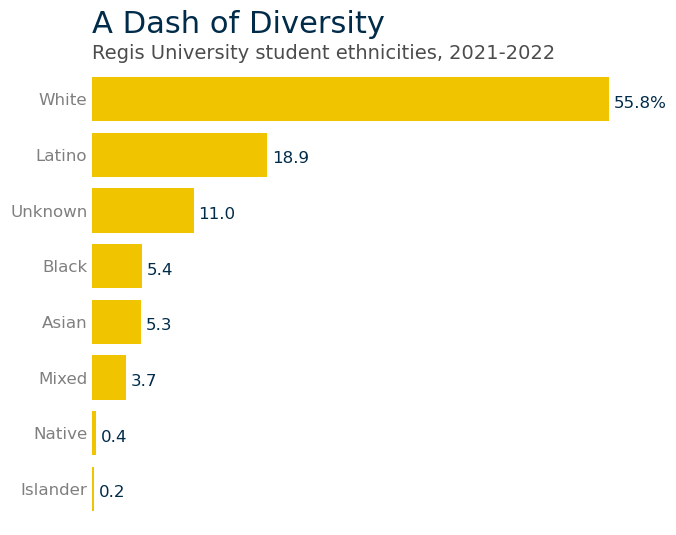

In [11]:
# Brand colors
regisBlue = "#002B49"
regisGold = "#F1C400"
greyAccent = "#D6D2C4"
myGrey = (0,0,0,.7)

fig, ax = plt.subplots(figsize=(7,6))
ser.sort_values(ascending=True).plot(kind="barh", ax=ax, width=.8, color=regisGold)

for p in ax.patches:
    s = f"{p.get_width():.1f}"
    if p.get_width() > 50:
        s += "%"
    ax.text(p.get_width()+0.5, p.xy[1]+0.25, s, color=regisBlue, fontsize = 12)


# Adjust the spines
ax.spines['right'].set_visible(False)  # Remove the right vertical line
ax.spines['top'].set_visible(False)    # Remove the top horizontal line
ax.spines['left'].set_visible(False)  
ax.spines['bottom'].set_visible(False) 

# Adjust y axis labels
ax.tick_params(axis='y', length=0)  
ax.set_yticklabels(ser.sort_values(ascending=True).index, fontsize=12, color=myGrey, alpha=0.5)


# adjust x axis labels
ax.xaxis.tick_top()
ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(axis='x', length=0)  

# Title
plt.text(0, 1.052, "A Dash of Diversity", transform=ax.transAxes, fontsize=22, color=regisBlue, va='bottom', ha='left') 
plt.text(0, 1.0, "Regis University student ethnicities, 2021-2022", transform=ax.transAxes, fontsize=14, color=myGrey, va='bottom', ha='left') 
plt.savefig("updatedImages/updated3.png")